## <center>REGRESIÓN LINEAL</center>

En este Notebook vamos a intentar hacer una regresión lineal para intentar predecir los precios de los bloques de viviendas en California según un censo de estas en 1990.

Lo primero que haremos será estudiar los datos y después una regresión lineal para intentar predecir los precios de las viviendas. Así, lo que haremos será:

* [1 Carga de datos](#1)
* [2 Análisis de los datos del DataFrame](#2)
* [3 Carga de datos](#3)
* [4 Relación entre los datos](#4)
* [5 Feature Engineering](#5)
* [6 Elección del modelo](#6)
    * [6.1 Partición de los datos](#6.1)
    * [6.2 Búsqueda del mejor modelo](#6.2)
    * [6.3 Intento de mejora de resultados](#6.3)
      * [6.3.1.- Eliminar columnas muy correlacionadas y con poca importancia en el primer modelo.](#6.3.1)
      * [6.3.2.- Volver a dividir los datos resultantes del paso 6.3.1. en train y test y buscar el mejor modelo para estas características.](#6.3.2)
      * [6.3.3.- Comparar los resultados de ambos modelos.](#6.3.3)
      
* [7 Prueba del modelo](#7)
* [8 Conclusiones y acciones futuras](#8)

## <center> 1.- CARGA DE DATOS </center><a class="anchor" id="1"></a>

El primer paso consistirá en cargar las librerías que vamos a usar en la primera fase del proyecto, que son:

* La carga de datos.
* Estudio de los datos.

Estas librerías serán, NumPy, Pandas, MatPlotlib y SeaBorn. Con NumPy y Pandas analizaremos los datos de forma numérica, mientras que MatPlotLib y Seaborn nos servirán para graficarlos y mostrarlos visualmente.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Una vez importamos las librerías, leemos los datos y lo convertimos en un DataFrame.

In [22]:
data = pd.read_csv('housing.csv',delimiter=',')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## <center> 2.- ANÁLISIS DE LOS DATOS DEL DATAFRAME </center><a class="anchor" id="2"></a>

Ahora empezamos el análisis de los datos.
El primer paso será estudiar los datos contenidos en el DataFrame, y este mismo:

Empezamos por ver su tamaño.

In [4]:
print(f'Las filas del DataFrame son {data.shape[0]} y las columnas {data.shape[1]}')

Las filas del DataFrame son 20640 y las columnas 10


Ahora comprobamos las primeras 5 filas y las últimas 5, para asegurarnos de que los datos empiezan justo después del encabezado y no hay nada superfluo, que nos pueda influir en los cálculos posteriores, al final.

In [4]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


Es ahora cuando debemos saber qué significa cada atributo de nuestros ejemplos en el caso que estemos estudiando. En este estudio, cada ejemplo es un bloque de edificios en el estado estadounidense de California, y cada dolumna significa:

* 1. **longitude**: Una medida de cuánto al oeste esta el edificio; a mayor valor, más al oeste.
* 2. **latitude**: Una medida de cuánto al norte esta el edificio; a mayor valor, más al norte.
* 3. **housingMedianAge**: Edad media del edificio; A menor valor, más nuevo es el edificio.
* 4. **totalRooms**: Número total de habitaciones dentro del edificio.
* 5. **totalBedrooms**: Número total de dormitorios dentro del edificio.
* 6. **population**: Número total de residentes dentro del edificio.
* 7. **households**: Número total de unidades familiares en el edificio.
* 8. **medianIncome**: Ingresos medios por unidad familiar medido en todo el edificio en miles de dólares americanos.
* 9. **medianHouseValue**: Valor medio de las casas por unidad familiar del edificio en miles de dólares americanos.
* 10. **oceanProximity**: Localización del edificio en relación al mar/océano.

Una vez hemos comprobado que todo está en orden, pasamos a ver los tipos del DataFrame:

In [6]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

Podemos observar que todas nuestras poseen datos de coma flotante (los comunmente conocidos como decimales), salvo la última, que es de tipo object (o string). Esto ya nos adelante, que muy probablemente, no tengamos valores perdidos en ninguna columna, ya que si los hubiese, nos aparecería como tipo "object".

Ahora lo que vamos a hacer es buscar una mayor información de todo el DataFrame, pero de forma más condensada, para que de un solo vistazo seamos capaces de saber el máximo número de caractterísticas de nuestros datos.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Aquí tenemos más a la vista los rangos de las filas, el número total de columnas, sus nombres, la cantidad de datos "no nulos" en relación al total de filas y el tipo de los datos de cada columna.

Como aquí el DataFrame no es muy grande, no parece muy importante, pero cuando se tienen docenas de columnas y miles de filas, esta es una ayuda inestimable.

Popr último vamos a hacer un estudio estadístico de todas las columnas que contengan datos numéticos. Este análisis es un análisis básico de estadística descriptiva, donde encontraremos la media de los datos por columna, su desviación típica, percentiles, etc.

## <center> 3.- PREPARACIÓN DE LOS DATOS </center><a class="anchor" id="3"></a>

Ahora llega el momento de preparar los datos de la mejor manera posible para el siguiente análisis en profundidad. Esto, lógicamnte, lo haremos en base al conocimiento adquirido en el punto anterior.

Así, borraríamos las columnas innecesarias si las hubiese, identificaremos filas y columnas duplicadas, renombraremos las columnas si fuese necesario, e identificaríamos "valores perdidos" y decidiríamos qué hacer con ellos en base a su número, importancia en los datos, etc.

Vamos a empezar estudiando si hay columnas que no sean necesarias por estar repetidas, porque de una forma u otra señalen lo mismo pero de forma diferente (por ejemplo, si tuviésemos una columna de largo, una de ancho y otra de metros cuadrados en el estudio de compra/venta de casas), etc.

Lo primero que vamos a hacer es ver qué columnas tenemos:

In [8]:
list(data.columns)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

Como podemos observar, no parece haber columnas duplicadas o redundantes, lo que viene determinado por el pequeño número de características del dataset (una columna es una característica o atributo, y una fila es un ejemplo) y porque este dataseet ya ha sido trabajado previamente para ser "depurado". De cualquier manera, aunque sepamos esta información, es conveniente no saltarse este paso debido a que puede haber habido errores a la hora de limpiar los datos, y siempre es bueno asegurarse por uno mismo de que el conjunto de datos está presentado de forma correcta para el posterior tratamiento.

Una vez que sabemos que sabemos que tenemos las columnas que creemos necesarias, psamos a estudiar los nombres d elas columnas: ¿Es necesario reescribir sus nombres? Aunque esto va a gustos, pues mucha gente pensaría que no es necesario en nuestro caso, yo voy a cambiar los nombres para poner la primera letra en mayúsculas, dado que así me es más fácil escribirlo, y voy a ahacer más cortos tanto "housing_median_age" como "median_house_value" pues me parecen largos y por ello incómodos:

In [23]:
data.rename(columns={'longitude':'Longitude', 'latitude':'Latitude', 'housing_median_age':'Median_age', \
            'total_rooms':'Total_rooms', 'total_bedrooms':'Total_bedrooms', 'population':'Population', \
            'households':'Households', 'median_income':'Median_income', 'median_house_value':'Median_value',\
            'ocean_proximity':'Ocean_proximity'}, inplace=True)

print(list(data.columns))

['Longitude', 'Latitude', 'Median_age', 'Total_rooms', 'Total_bedrooms', 'Population', 'Households', 'Median_income', 'Median_value', 'Ocean_proximity']


Vemos que parece que se han cambiado correctamente, pero lo revisamoso con un "head()":

In [24]:
data.head()

,Longitude,Latitude,Median_age,Total_rooms,Total_bedrooms,Population,Households,Median_income,Median_value,Ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [25]:
data.loc[data.duplicated()]

,Longitude,Latitude,Median_age,Total_rooms,Total_bedrooms,Population,Households,Median_income,Median_value,Ocean_proximity


Podemos ver que la instrucción nos devuelve un DataFrame vacío, lo que nos señala que no tenemos valores duplicados en ninguna fila, o lo que es lo mismo, y seguramente más importante, no tenemos ejemplos duplicados.

Pasemos ahora a ver si tenemos "valores perdidos", o alguna característica de alguno de nuestros ejemplos sin datos. Para ello haremos lo mismo que anteriormente pero usando "isna()".

In [26]:
data.isna().count()

Longitude          20640
Latitude           20640
Median_age         20640
Total_rooms        20640
Total_bedrooms     20640
Population         20640
Households         20640
Median_income      20640
Median_value       20640
Ocean_proximity    20640
dtype: int64

Como podemos ver, aparentemente, tampoco tenemos valores repetidos, que, como hemos dicho antes, se explica por el pretratamiento de los datos. De cualquier manera, es importante tener claro que esta es una primera aproximación, y el adverbio "aparentemente" es importante.

De cualquier manera, ya sabemos con qué datos estamos trabajando y cómo están estructurados. Ahora pasamos a ver las relaciones de los datos entre ellos.

Ya sabemos que no hay columnas duplicadas, pero ¿estamos seguros con las filas?

También debemos comprobar que no tengamos ninguna fila repetida que pueda estropear los resultados de nuestro estudio:

## <center> 4.- RELACIÓN ENTRE LOS DATOS </center><a class="anchor" id="4"></a>

¿Qué relación tienen las diferentes características entre ellas? ¿Puede ser que de tan relacionadas como estén entre ellas puedan afectar al modelo predictivo? ¿Sería entonces necesario eliminar atributos y/o ejemplos para tener unos datos más fiables?

A estas y otras preguntas vamos a intentar dar respuesta en este apartado. Para ello vamos a intentar estudiar y comprender los datos que poseemos. Ya no vamos a trabajar con el DataFrame en sí, sino que vamos a "bajar al barro" e intentar entender qué datos tenemos entre manos y sus relaciones entre ellos.

Ya vimos más arriba que tenemos una primera herramienta de aproximación con la función "describe()" para estudiar los datos estadísticos básicos de todas las características numéricas de nuestro DataFrame:

In [13]:
data.describe()

,Longitude,Latitude,Median_age,Total_rooms,Total_bedrooms,Population,Households,Median_income,Median_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


¿Pero por qué no observar visualmente la relación entre los datos?

Para ello tenemos las librerías que nos dibujan los gráficos según lo que necesitemos ver, como son MatPlotLib y Seaborn.

Comencemos haciendo un recuento de las variables, es decir, cómo se encuentran repartidos los bloques según la variable estudiada:

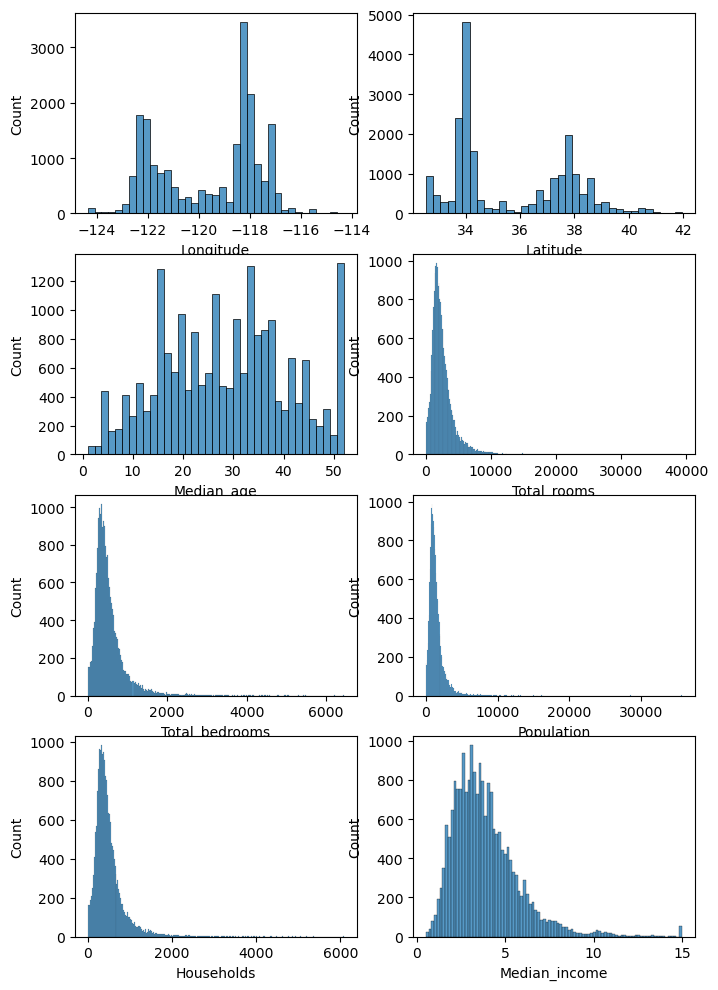

In [14]:
figura, axes = plt.subplots(4,2,figsize=(8, 12), sharex=False)

atributos = data.columns

for i in range(8):
    
    sns.histplot(data=data, x=atributos[i], ax=axes[i//2,i%2])

Podemos obsevar que el mayor número de casas se encuentran en la latitud -117 aproximadamente y la latitud 34, aunque también hay bastantes en las latitudes entre -123 y -118 y en la -115, y las latitudes 32 y 34. En cuanto ala edad, vemos que tiene muchos picos, pero en general, las franjas por decenios parecen muy estables, mientras que en el resto de variables, están todas muy concentradas y a medida que nos alejamos del origen disminuyen drásticamente, por lo que podemos decir que son bastante homogéneas.

Veamos ahora qué relaciones hay entre los atributos de nuestro DataFrame y la que entendemos que será nuestra "variable de salida", el precio medio de los bloques con los que estamos trabajando:

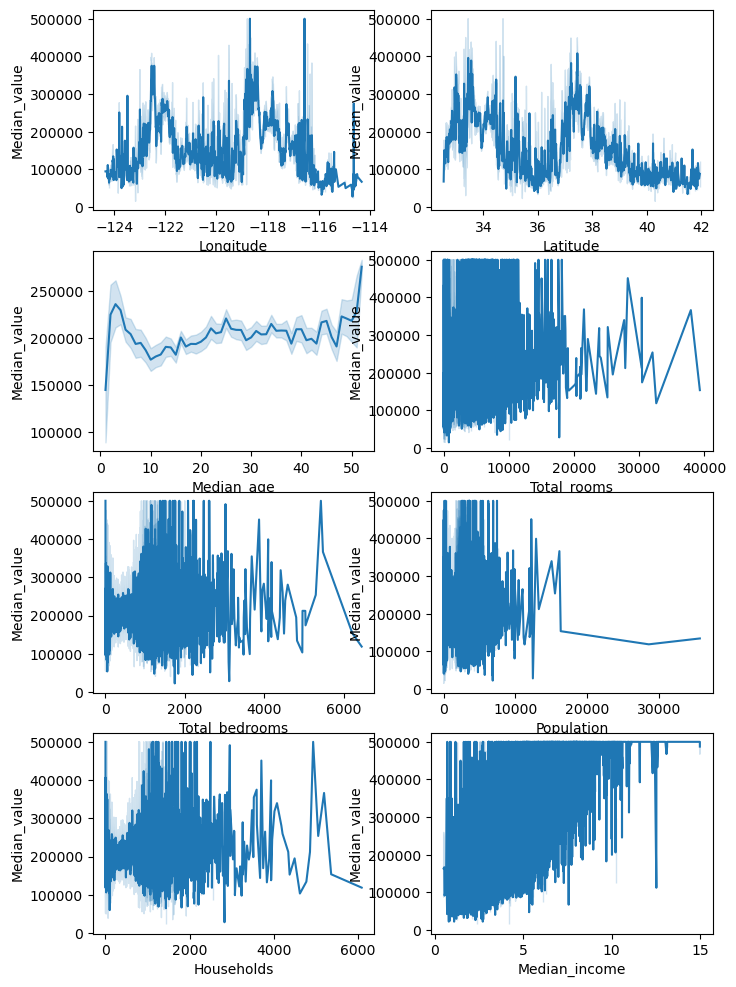

In [15]:
figura, axes = plt.subplots(4,2,figsize=(8, 12), sharex=False)

for i in range(8):
    
    sns.lineplot(data=data, x=atributos[i], y=data.Median_value, ax=axes[i//2,i%2])

Por intuición, podemos pensar que la ubicación, la edad del edificio y el total de habitaciones y dormitorios podrían tener bastante relación con el precio de los bloques de viviendas, ¿pero es esto así?. Según observamos en las gráficas de los datos, podemos observar ciertas relaciones de las variables estudiadas con la variable de salida. En cuanto a la longitud, vemos que las casas más caras están entorno  a las longitudes -119 y -115, mientras que la latitud está entorno a 33 y 37 grados, por lo que ya podemos ubicar dónde están, más o menos, los bloques más caros (si quisiésemos afinar, podríamos hacer un lineplot concreto para estas 2 variable únicamnete). Por otro lado, y de forma sorprendente, parece que los bloquqes más caros son los más antiguos. En cuanto al resto de variables, podemos ver que a medida que sus números se hacen mayores hay, por un lado, un menor número de bloques, y por otroel preco de los bloques se hace muy inestable, lo que puede indicar que otros factores son más importantes que estos a la hora de ajustar sus precios.

Veamos ahora los "outlayers", o valores que se salen, por mucho, de la distribución "normal" de los datos. Este tipo de datos suelen tener mucho efecto en los modelos y hay que tenerlos en cuenta sobre toso a la hora de elegir las métricas con las que mediremos lo bien o mal que está funcionando nuestro modelo.

Para buscar los outlayers, usaremos los llamados "boxplots", que son gráficos

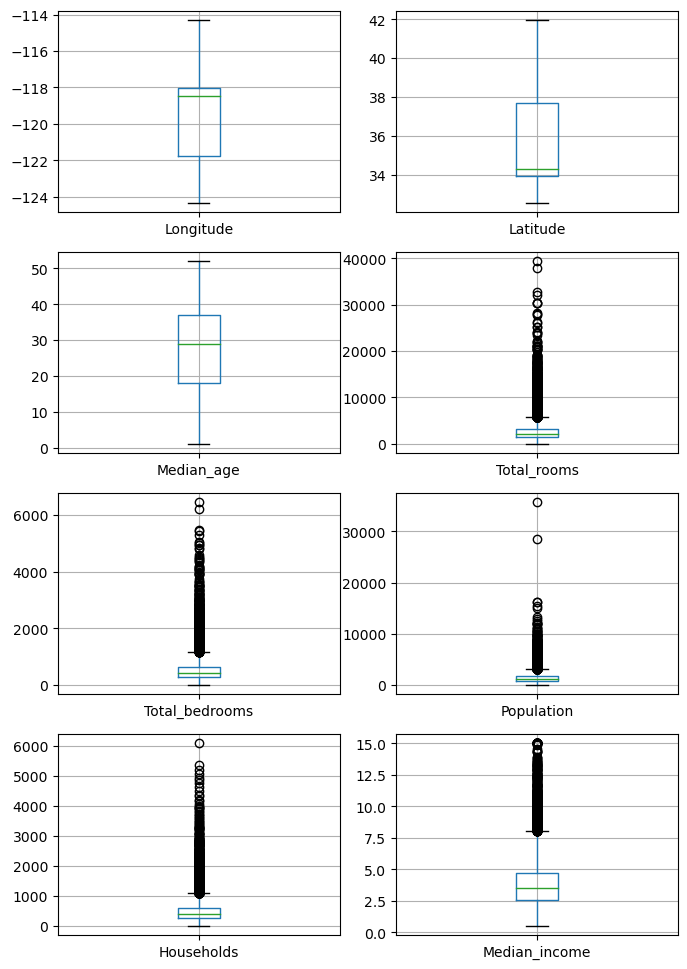

In [16]:
figura, axes = plt.subplots(4,2,figsize=(8, 12), sharex=False)

for i in range(8):
    
    data.boxplot(column=atributos[i], ax=axes[i//2,i%2])

Para estudiar las relaciones entre los datos, son muy interesantes las correlaciones entre ellos. En este caso usaremos la Correlación de Pearson, que nos permitirá medir la relación lineal entre 2 variables cuantitativas. Este coeficiente se define como la relación entre la covarianza de ambas variables y la raiz cuadrada del producto de la varianza de las 2 variables, de tal forma que:

$$  \frac {Cov(X,Y)}{\sqrt{VarX \cdot VarY}} $$.

Esta fórmula nos dará un número comprendido entre -1 y 1, que nos señalará:

* La fuerza de la correlación.
* La dirección de la correlación.

Si la correlación es igual a 1 ó -1, entonces las variables tiene una correlación perfecta positiva o negativa, según el caso; si la correlación es uno, una variable aumentará proporcionalmente cuando la otra aumente, y si es -1, la variable decrecerá proporcionalmente al decrecimiento de la otra. Así, la relación lineal entre las variables será fuerte. A medida que la correlación se aleja de esos valores (1 y -1), la correlación se hace más débil, y si esta es igual a cero, significará que no hay relación lineal entre las variables. Es importante, en este caso, saber que esto no significa que las variables no estén relacionadas entre sí, sino que no están relacionadas linealmente.

Vamos a calcular la relación lineal de las variables cuantitativas de nuestro conjunto de datos:

In [87]:
data_corr = data.iloc[:,0:9].corr()
data_corr

,Longitude,Latitude,Median_age,Total_rooms,Total_bedrooms,Population,Households,Median_income,Median_value
Longitude,1.000000,-0.924664,-0.108197,0.044568,0.068831,0.099773,0.055310,-0.015176,-0.045967
Latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066147,-0.108785,-0.071035,-0.079809,-0.144160
Median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318710,-0.296244,-0.302916,-0.119034,0.105623
Total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.925723,0.857126,0.918484,0.198050,0.134153
Total_bedrooms,0.068831,-0.066147,-0.318710,0.925723,1.000000,0.871989,0.972731,-0.007511,0.049406
Population,0.099773,-0.108785,-0.296244,0.857126,0.871989,1.000000,0.907222,0.004834,-0.024650
Households,0.055310,-0.071035,-0.302916,0.918484,0.972731,0.907222,1.000000,0.013033,0.065843
Median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007511,0.004834,0.013033,1.000000,0.688075
Median_value,-0.045967,-0.144160,0.105623,0.134153,0.049406,-0.024650,0.065843,0.688075,1.000000


En este cuadro podemos ver las correlaciones de todas las variables con el resto de ellas de forma numérica. La "diagonal principal", es decir, la que diagonal central que va de izquierda a derecha desde el peimer valor de la matriz, es siempre uno, dado que la correlación de una variable consigo misma es siempre uno. Por otro lado, podemos ver que es una "matriz simétrica", porque esa diagonal divide en dos partes iguales a la matriz. ¿Per opodríamos ver más claramente estas correlaciones entre variable? La respuesta es sí, con un "mapa de calor", que no es más que una matriz de correlaciones "dibujada con colores". De esta manera, el mapa de calor nos señalará la relación entre las variable, no sólo por su valor numérico, sino que le dará un color que nos hará más fácil, visualmente, verla. Cuanto más claro sea el color, mayor relación, negativa o positiva, habrá entre las variables.

Veamos el mapa de calor de nuestras variables.

<Axes: >

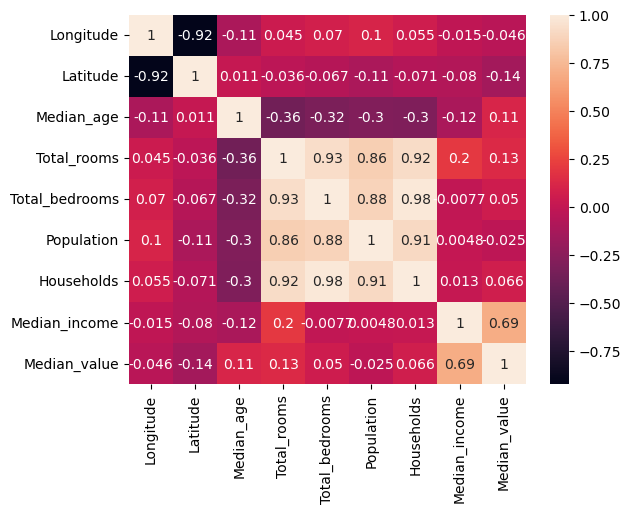

In [18]:
plt.figure()
sns.heatmap(data_corr, annot=True)

Aquí podemos ver más claramente las relaciones lineales entre variables. Todas aquellas cuyo color tiende al blanco, están muy relacionadas entre ellas (en este caso, de forma positiva). Con este mapa, podemos ver que "total romms" está estrechamente relaionada con "total bedrooms", "population" y "households", mientras quqe ""total bedrooms"", además d ela anterior, también está muy relacionada con "population" y "households". Como cabía esperar, "population" y "households" están muy relacionadas entre sí y con las 2 anteriores.

Con estos datos en la mano, podemos pensar que, dado que nuestro modelo es un modelo de regresión lineal, estas variables podrían generarnos problemas a la hora de entrenar nuestro modelo, por lo que sería bueno pensar en no utilizarlas todas en ese entrenamiento. Por este motivo, y para asegurarnos de que esta hipótesis es correcta, entrenaremos dos modelos: Uno con todas las variables, y otro eliminando las que consideremos que pueden ser un problema a la hora de abordar el problema.


## <center> 5.- FEATURE ENGINEERING </center><a class="anchor" id="5"></a>

El Feature Engineering o la ingeniería de características, trata de crear y/o modificar nuestras variablespra, por un lado, poder trabajar con ellas cómodamente en cualquier modelo de Machine Learning, o, por otro, poder mejorar los resultados de esos modelos. En este campo, se pueden hacer muchas cosas:

* 5.1.- Imputar valores a los campos perdidos.
* 5.2.- Transformar variables categóricas a numéricas.
* 5.3.- Generar nuevas variables a partir d elas originales.
* 5.4.- Seleccionar conjuntos de variables que permitan a los modelos aprender más rápido y/o mejor.
* 5.5.- etc.

En primer lugar, vamos a recordar qué tipos de datos contenían nuestras variables en el Dataset, y si teníamos o no valores perdidos entre sus características. Para ello, utilizamos de nuevo el método "info()":

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Longitude        20640 non-null  float64
 1   Latitude         20640 non-null  float64
 2   Median_age       20640 non-null  float64
 3   Total_rooms      20640 non-null  float64
 4   Total_bedrooms   20433 non-null  float64
 5   Population       20640 non-null  float64
 6   Households       20640 non-null  float64
 7   Median_income    20640 non-null  float64
 8   Median_value     20640 non-null  float64
 9   Ocean_proximity  20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Con los datos de la celda anterior podemos observar 2 cosas:

* 1.- Nuetros ejemplo tiene valores perdidos en la columna "Total_bedrooms", que habrá que imputar.
* 2.- Solamente uno de nuestros ejemplos no es numérico, sino de tipo "object".

Las columnas Total_bedrooms y "Ocean_proximity" son candidatas a aplicarles ingeniería de características.

Empecemos por Ocean_proximity, viendo que tipo de datos contiene:

In [28]:
print(data.Ocean_proximity.unique())
print(f'El número total de valores no numéricos de "Ocean_proximity" es de : {len(data.Ocean_proximity.unique())}')

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']
El número total de valores no numéricos de "Ocean_proximity" es de : 5


Podemos observar que la columna posee 5 valores de tipo "string" que nos marcan su cercanía o lejanía al mar, si está en una isla o en tierra, etc. A simple vista, parece que es un dato que pueda ser significativo a la hora de marcar el precio de un bloque de viviendas, por lo que descartamos eliminar ese ejemplo de nuestro estudio. Lo que tenemos que hacer es **<font color='red'><u>convertir esos valores en numéricos</u></font>**. Para ello utilizaremos el reemplazo por conteo, es decir, reemplazaremos cada string de la columna por el número de veces que aparece en el dataset, en este caso en la columna "Ocean_proximity". 

Ene ste caso concreto, hemos decidido utilizar este sistema, porque, aunque tiene como problemas que asume al numerarlos una especie de orden entre los valores sustituidos, y que los nuevos valores pueden ser utilizados en operaciones posteriores, no queremos crear más variables en nuestro dataset, como ocurriría si utilizamos los métodos "One Hot" o la "codificación binaria", por ejemplo.

Pasemos a hacerlo:

In [5]:
# Primero instalamos la librería "category_encoders"
# para poder imputar los valores.
!pip install category_encoders

  Obtaining dependency information for category_encoders from https://files.pythonhosted.org/packages/1f/e2/495811f12b2e90753fff0e42a07adb0370a725de17cc23a579ac9d3ca67c/category_encoders-2.6.2-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/81.8 kB ? eta -:--:--
   ---------------------------------------- 81.8/81.8 kB 4.8 MB/s eta 0:00:00


In [29]:
# Importamos la librería
import category_encoders as ce

# Creamos el objeto encoder desde la clase
# "CountEncoder" y luego lo entrenamos y
# transformamos.
encoder = ce.CountEncoder(cols=['Ocean_proximity'])
data = encoder.fit_transform(data)
# Comprobamos que todo haya ido bien.
data.head()

,Longitude,Latitude,Median_age,Total_rooms,Total_bedrooms,Population,Households,Median_income,Median_value,Ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,2290
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,2290
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,2290
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,2290
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,2290


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Longitude        20640 non-null  float64
 1   Latitude         20640 non-null  float64
 2   Median_age       20640 non-null  float64
 3   Total_rooms      20640 non-null  float64
 4   Total_bedrooms   20433 non-null  float64
 5   Population       20640 non-null  float64
 6   Households       20640 non-null  float64
 7   Median_income    20640 non-null  float64
 8   Median_value     20640 non-null  float64
 9   Ocean_proximity  20640 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.6 MB


Como podemos ver ahora, ya hemos convertido todas nuestras columnas en numéricas, por lo que podemos empezar a pensar en cómo imputar los valores perdidos.

Ahora le toca el turno a la columna Total_bedrooms, que tiene un total de 207 valores nulos:

In [30]:
print(f'El número total de valores perdido de la columna Total_bedrooms es de: {data.Total_bedrooms.isnull().sum()}')

El número total de valores perdido de la columna Total_bedrooms es de: 207


¿Qué hacer ahora? Lógicamnete necesitamos que nuestro conjunto de datos no tenga valores perdidos, por lo que tenemos que imputar valores a esos datos que no tenemos. Para esto hay 2 estrategias fundamentales:

* 1.- Imputar la media aritmética de los datos de la columna.
* 2.- Imputar la moda de los datos de la columna.

En nuestro caso, vamos a decidirnos por imputar la moda, ya que entendemos que es más fiable que la media, que puede estar muy influenciada por la gran cantidad de valores atípicos que hemos observado en esa columna. La moda, aunque no está libre de ese sesgo completamnete, sí es menos influenciable.

Apliquemos la moda a los valores perdidos:

In [31]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

data.Total_bedrooms = imputer.fit_transform(data.Total_bedrooms.values.reshape(-1,1))
data.head()

,Longitude,Latitude,Median_age,Total_rooms,Total_bedrooms,Population,Households,Median_income,Median_value,Ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,2290
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,2290
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,2290
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,2290
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,2290


In [32]:
print(data.isnull().sum())

Longitude          0
Latitude           0
Median_age         0
Total_rooms        0
Total_bedrooms     0
Population         0
Households         0
Median_income      0
Median_value       0
Ocean_proximity    0
dtype: int64


De esta manera, y apodemos quedarnos tranquilos y continuar hacia delante.


## <center> 6.- ELECCIÓN DEL MODELO </center><a class="anchor" id="6"></a>

Como ya hemos señalado más arriba, vamos a utilizar un modelo de regresión lineal para intentar predecir el precio de los bloques de viviendas. Dado que después de observar las correlaciones entre las características, sospechamos quqe algunas de ellas pueden ser redundantes, utilizaremos la regresión Lasso, ya que realiza selección de características y puede valorar si una de ellas está midiendo lo mismo o algo similar que alguna de las otras.

Como ya sabemos, la regresión lineal responde a una función lineal tipo $ y = ax + b $, lo que no significa que sólo podamos utilizar un modelo lineal para intentar resolver el problema, ya que la ingeniería de características nos permite usar variables polinómicas para buscar la mejor adecuación de nuestro modelo a los datos. Así, utilizaremos un modelo de regresión lineal con características polinomiales, que son características añadidas a nuestro dataset mediante el proceso de combinarlas con operaciones matemáticas (como $ x^2, \sqrt[2]{x}$, etc.). De esta manera, conseguiremos que nuestro modelo se adecúe bien a problemas de regresión no lineales.

También normalizaremos las variables, es decir, las pondremos a todas en el mismo rango y tengan una dispersión similar. Esto lo haremos utilizando la normalización d ela media y la desviación estándar, que consiste en  restar a los valores de cada variable la media de la propia variable y dividirlos por su desviación estándar, de tal forma que $x_j^{(i)} = \frac{x_j^{(i)} - \mu_j}{\sigma_j}$. Según esta fórmula, a cada ejemplo ($x_j^{(i)}$) le restamos su media ($ \mu{_j}$) y a ese resultado lo dividimos por la desviación típica de la muestra (${\sigma_j}$).

Llegados aquí, señalar que, en principio, usaremos una regresión lineal por solución directa, dado que es más sencilla computacionalmente y más rápida en llegar al resultado. 

No menos importante es la elección de la métrica de rendimiento, que nos señalará cómo de bien o mal está funcionando nuestro modelo. En problemas de regresión existen varias métricas diferentes, pero la más utilizada es, normalmente, la llamada Error cuadrático medio, (norma L2), que consiste en calcular la media de los errores del modelo (diferencia entre el valor predicho, $\hat{y}$, y el valor real de un ejemplo) al cuadrado. Elevar los errores al cuadrado implica que los errores más grandes penalizan mucho más el rendimiento general del sistema. $$MSE = \frac{\sum_{i=1}^{N} (y_i - \hat{y_i})^2}{N}$$. Por este motivo nosotros **no** la elegiremos, dado que hemos visto, en el estudio de nuestros datos, que tenemos valores inesperados en varias de los ejemplos del dataset. Para no "castigar" a nuestro modelo, lo que haremos es elegir otra métrica, esta llamada "Error absoluto medio", que hace lo mismo que la anterior pero en vez de elevar los resultados al cuadrado, lo convierte a su valor absoluto ($MAE = \frac{\sum_{i=1}^{N} |y_i - \hat{y_i}|}{N}$). Esto no castiga a los outlayers y por ende nos dará un resultado más fiable sobre el funcionamiento d nuestro modelo.

Por último, señalar que para hacer más sencillo el codigo y evitar errores, utilizaremos la herrramienta llamada "Pipeline", a la que le diremos qué trabajo hay que hacer (polinomiales, estandarización y regresión) y ella se encargará de ordenarlo todo y llevarlo a cabo.

Para concluir, vamos a especificar los pasos que vamos a dar a la hora de intentar predecir el precio de los bloques de las viviendas:

* 1.- Dividiremos nuestros datos en 2 grupos:
        * 1.1.- Datos de entrenamiento.
        * 1.2.- Datos de test.
        
* 2.- Intentaremos encontrar variables polinomiales para resolver el problema d ela mejor manera posible.

* 3.- Entrenaremos un modelo de regresión logística con los datos de entrenamiento y comprobaremos cómo de bien/mal funciona.

* 4.- Generalizaremos el modelo intentando predecir los datos de test con el modelo entrenado. Cuanto más se acerquen las predicciones a las etiquetas reales, mejor generalizará el modelo.



#### <center> 6.1.- PARTICIÓN DE LOS DATOS: </center><a class="anchor" id="6.1"></a>

Lo primero que vamos a hacer es separar de nuestro conjunto de datos la variable de salida. 

Como ya hemos señalado anteriormente, esta variable de salida será la columna llamada "Median_value", porque es la que marca el precio medio de los bloques de ejemplo.

In [33]:
# Creamos una variable con el nombre de la
# columna que será nuestra variable de salida.
salida = 'Median_value'

# Copiamos el DataFrame de los datos a una
# variable llamada "X"
X = data.copy()

# Y almacenamos en otra variable llamada "y",
# la columna que será nuestra variable de salida.
y = X[salida].copy()

# Borramos de "X" la variable de salida para evitar
# el "Data Leakage".
X.drop(salida, axis=1, inplace=True)

# Y nos aseguramos de tener los mismos tamaños en
# las 2 variables.
print(X.shape)
print(y.shape)

(20640, 9)
(20640,)


Ahora dividimos nuestro datos en 2 conjuntos diferenciados: Train y test. Para ello, importamos la librería correspondiente (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Como es habitual en Machine Learning, vamos a dividir los datos en:

* 1.- Train = 80%

* 2.- Test = 20%

In [34]:
# Importamos de "Scikit Learn" la clase que nos
# va a permitir dividir nuestros datos.
from sklearn.model_selection import train_test_split

# Creamos 4 variables donde almacenamos los datos
# d ela partición
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Y cosa muy importante, comprobamos que los tamaños de
# las particiones sean los adecuados para que luego el
# modelo pueda realizar los cálculos de álgebra lineal
# correctamnente.
print(f'El número total de ejemplos de "X_train" es de: {len(X_train)}: Sus dimensiones son: {X_train.shape}')
print(f'El número total de ejemplos de "X_test" es de: {len(X_test)}: Sus dimensiones son: {X_test.shape}')
print(f'El número total de ejemplos de "y_train" es de: {len(y_train)}: Sus dimensiones son: {y_train.shape}')
print(f'El número total de ejemplos de "y_train" es de: {len(y_test)}: Sus dimensiones son: {y_test.shape}')

El número total de ejemplos de "X_train" es de: 16512: Sus dimensiones son: (16512, 9)
El número total de ejemplos de "X_test" es de: 4128: Sus dimensiones son: (4128, 9)
El número total de ejemplos de "y_train" es de: 16512: Sus dimensiones son: (16512,)
El número total de ejemplos de "y_train" es de: 4128: Sus dimensiones son: (4128,)


Una vez que tenemos divididos los datos en los conjuntos de entrenamiento y test, llega la hora de estudiar si utilizando variables polinomiales podemos crear un mejor modelo y, si es así, qué polinomial sería más conveniente.

Para ello, vamos a entrenar diferentes modelos de regresión lineal con solución directa. Un modelo por cada polinomial. A cada uno de ellos, le dediremos el error (con el error absoluto medio que hemos comentado más arriba), y en base a este, decidiremos con cuál hacer las predicciones.

Para llevar esto a can¡bo, crearemos una Pipeline que recorra los diferentes polinomiales, estandarice los datos, lleve a cabo  la regresión y calcule los errores por cada polinomial. Estos errores los guardaremos en un diccionario para luego estudiarlos y decidir cuál de ellos es el mejor para nuestro modelo.

In [35]:
# Primero, importamos las librerías necesarias:

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

Lo primero que vamos a hacer es ver cuántos atributos (características) tendremos por cada ejemplo en cada grado de polinomial, para calcular, aproximadamente, el tiempo de computación de nuestra Pipeline. Esto es así, porque al introducir polinomiales, y debido al funcionamiento de estas, el número de atributos se eleva, ya que no sólo añadimos el grado, sino también la relación de ese grado con todas las características del dataset. Así, el número de características se elevará exponencialmete con cada nivel de polinomio.

In [29]:
numero_atributos = []

grados = range(1,20) 

for grado in grados:
    poly = PolynomialFeatures(degree = grado, include_bias = False)
    poly.fit(X_train)
    numero_atributos.append(len(poly.get_feature_names_out()))
    
total_atributos = pd.DataFrame(data=numero_atributos, columns=['Atributos'], index=(range(1,20)))
total_atributos

,Atributos
1,9
2,54
3,219
4,714
5,2001
6,5004
7,11439
8,24309
9,48619
10,92377


Como podemos ver, el número de atributos crece de forma exponencial, llegando a un punto en que el número de atributos se hace prácticamente inmanejable, pues ya en el grado 10 tenemos 92377 características para cada uno de nuestros ejemplos. ¡Ni comentario requieren los seis millones novecientos seis mil ochocientos noveinta y nueve del grado 20! Por este motivo, por eficiencia computacional, sólo vamos a buscar entre los 9 primeros grados de polinomial, para estudiar cómo de bien funciona nuestro modelo. Si luego fuese el caso y lo creyésemos necesario, siempre podríamos intentarlo con mayores números más adelante.

Al utilizar la regresión lineal "Lasso", debemos también pensar en qué coeficiente "$\alpha$" utilizar. Este $\alpha$ es un coeficiente que modificará la función de coste para intentar generar un mejor modelo. 

Como podemos ver, en este caso tenemos dos hiperparámetros para decidir en nuestro modelo. Para buscar cuáles son los mejores hiperparámetros, utilizaremos un método llamado Gridsearch, que irá haciendo las pruebas necesarias hasta encontrar, entre todas las combinaciones posibles, el mejor modelo.

La idea es redividir nuestro conjunto de entrenamiento otra vez para obtener un subconjunto de entrenamiento y otro de validación (con ShuffleSplit) y aplicarles, mediante combinatoria, los grados polinomiales y los $\alpha$ correspondientes (que le pasaremos en  "grados" y "reg_values"). Al pasarle una métrica, la propia búsqueda (GridSearchCV) nos proporcionará cuáles son los errores tanto en entrenamiento como en validación, y con esas medidas, intentaremos decidir cuál es el mejor modelo.

#### <center> 6.2.- BÚSQUEDA DEL MEJOR MODELO: </center><a class="anchor" id="6.2"></a>

In [11]:
# Creamos el objeto para el particionamiento de la validación.
cv = ShuffleSplit(n_splits=5, test_size=.3, random_state=0)

# Probamos diferentes valores de grado del polinimio
# y regularización (grid-search).
grados = np.arange(1, 10)
reg_values = np.geomspace(1e-5, 1e5, num=9)

# Diccionario de parámetros a probar: Es el "Scoring"
# del GridSearch().
# Al ser una pipeline, usamos nombre__parámetro.
parameters = {'poly__degree': grados, 'reg__alpha': reg_values}

# Generamos la Pipeline.
pipe = Pipeline([('poly', PolynomialFeatures(1, include_bias=False)),
                 ('scaler', StandardScaler()),
                 ('reg', Lasso(max_iter=10000, random_state=0))])

# Generamos el objeto GridSearch.
gridsearch = GridSearchCV(pipe, parameters, cv=cv,
                          scoring='neg_mean_absolute_error',
                          refit=True,
                          return_train_score=True,
                          n_jobs=-1)

gridsearch.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.3, train_size=None),
             estimator=Pipeline(steps=[('poly',
                                        PolynomialFeatures(degree=1,
                                                           include_bias=False)),
                                       ('scaler', StandardScaler()),
                                       ('reg',
                                        Lasso(max_iter=5000, random_state=0))]),
             n_jobs=-1,
             param_grid={'poly__degree': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'reg__alpha': array([1.00000000e-05, 1.77827941e-04, 3.16227766e-03, 5.62341325e-02,
       1.00000000e+00, 1.77827941e+01, 3.16227766e+02, 5.62341325e+03,
       1.00000000e+05])},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [12]:
# Buscamos el mejor modelo y lo guardamos con Pickle
Modelo_Lasso = gridsearch.best_estimator_
Modelo_Lasso

Pipeline(steps=[('poly', PolynomialFeatures(degree=5, include_bias=False)),
                ('scaler', StandardScaler()),
                ('reg',
                 Lasso(alpha=17.78279410038923, max_iter=5000,
                       random_state=0))])

In [20]:
resultados = pd.DataFrame(gridsearch.cv_results_,
                          columns=['params','mean_train_score', 'mean_test_score', 'rank_test_score'])\
.sort_values(by=['rank_test_score'])
resultados.head()

,params,mean_train_score,mean_test_score,rank_test_score
41,"{'poly__degree': 5, 'reg__alpha': 17.782794100...",-40987.078695,-41965.865774,1
77,"{'poly__degree': 9, 'reg__alpha': 17.782794100...",-39159.101077,-42259.124878,2
31,"{'poly__degree': 4, 'reg__alpha': 1.0}",-41101.889668,-42622.029458,3
30,"{'poly__degree': 4, 'reg__alpha': 0.0562341325...",-41083.279606,-42772.729889,4
29,"{'poly__degree': 4, 'reg__alpha': 0.0031622776...",-41082.715792,-42779.216257,5


In [14]:
import pickle

with open("Modelo_Lasso.pkl", "wb") as f:
    pickle.dump(Modelo_Lasso, f)

In [36]:
import pickle

with open("Modelo_Lasso.pkl", "rb") as f:
    ModeloLasso = pickle.load(f)

In [23]:
def plot_validation_curve(train_scores, test_scores, param_range, ax=None, param='Param', score='Score', scale=None):
    # Hacemos la media de los errores y sus desviaciones estándar
    train_scores_mean = np.mean(-train_scores, axis=1)
    train_scores_std = np.std(-train_scores, axis=1)
    test_scores_mean = np.mean(-test_scores, axis=1)
    test_scores_std = np.std(-test_scores, axis=1)
    
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 6))

    ax.set_title("Validation Curve")
    ax.set_xlabel(param)
    ax.set_ylabel(score)
        
    lw = 2
    if scale is None:
        plot_fun = ax.plot
    else:
        plot_fun = ax.semilogx
    plot_fun(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    ax.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plot_fun(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    ax.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    ax.legend(loc="best")
    
    return ax

In [55]:
# Miramos las curvas de aprendizaje del modelo
# para cerciorarnos de que tenemos controlado
# tanto el bias como la varianza.

from sklearn.model_selection import learning_curve

def plot_learning_curve(train_sizes, train_scores, test_scores, ax=None, ylim=None):
    if ax is None:
        _, ax = plt.subplots(1, 1, figsize=(8, 6))

    ax.set_title("Curva de aprendizaje")
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("m (ejemplos en train)")
    ax.set_ylabel(r"Error $J(\theta)$")

    train_scores_mean = np.mean(-train_scores, axis=1)
    train_scores_std = np.std(-train_scores, axis=1)
    test_scores_mean = np.mean(-test_scores, axis=1)
    test_scores_std = np.std(-test_scores, axis=1)

    # Plot learning curve
    ax.grid()
    ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                      color="g")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    ax.legend(loc="best")
    return plt


# Para que salga la curva suave repetimos 100 veces con ShuffleSplit
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

train_sizes, train_scores, test_scores = \
    learning_curve(ModeloLasso,
                   X_train,
                   y_train,
                   cv=cv, 
                   scoring='neg_mean_absolute_error', 
                   train_sizes=np.linspace(0.1, 1, 9),
                   n_jobs=-1)



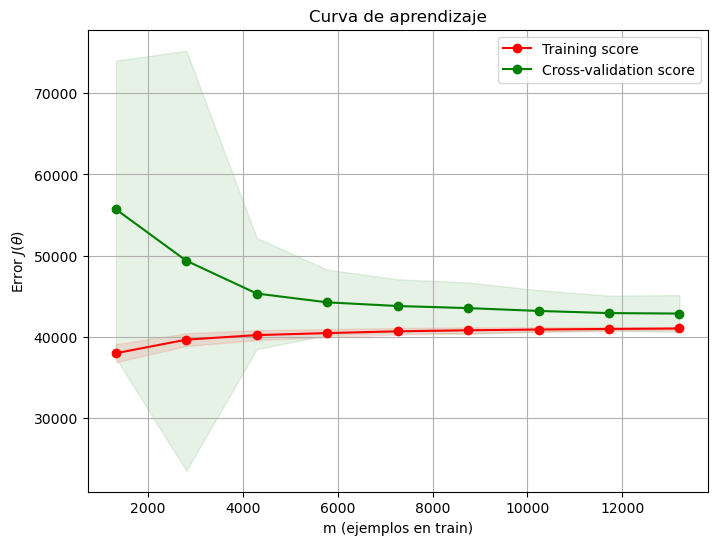

In [57]:
plot_learning_curve(train_sizes, train_scores, test_scores)
plt.show()

In [81]:
import shap

explainer = shap.Explainer(ModeloLasso.predict,X_train)
shap_values = explainer(X_train)

Exact explainer: 16513it [4:46:48,  1.04s/it]                                                                          


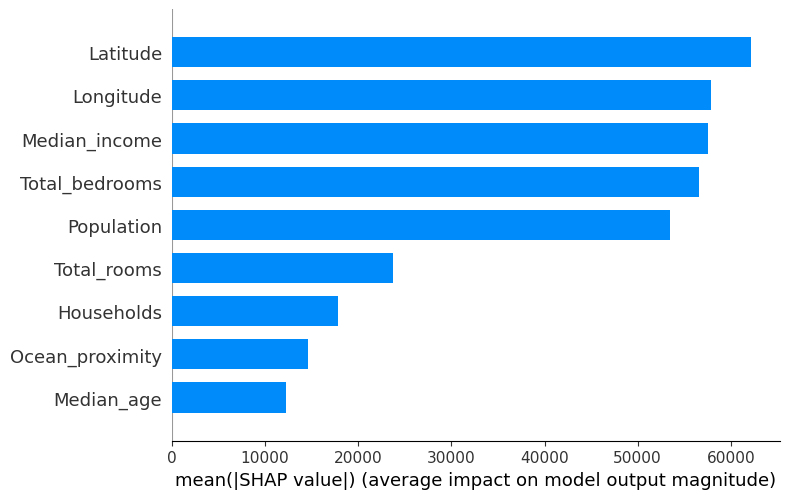

In [82]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

Con este gráfico, podemos ver muy claramente Impacto medio en la magnitud de salida del modelo de cada una de las características de nuestro dataset. Podemos comprobar que las características más importantes son:
* Latitud
* Longitud
* Los ingresos medios
* El total de habitaciones y
* Habitantes

El resto de ellas, están muy alejadas en importancia para nuestro modelo.

En otrto orden de cosas, también podemos visualizar loso datos de forma desagregada, o lo que es lo mismo, cómo influye cada ejemplo en la importancia de cada variable.

Para ello, usaremos el siguiente gráfico:

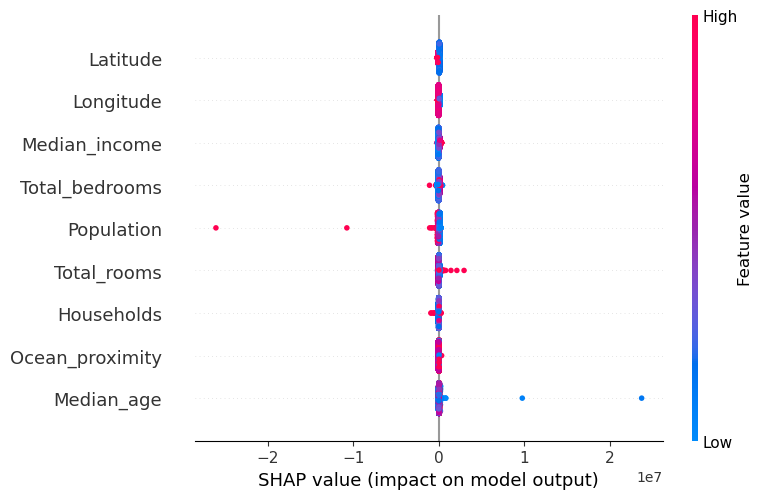

In [85]:
shap.summary_plot(shap_values, X_train)

¿Cómo se interpreta el gráfico anterior?

El gráfico está compuesto de muchos puntos (tantos como ejemplos por cada variable) y muestra la siguiente información:
* **Importancia de la variable:** Las variables están ordenadas por importancia (de mayor, arriba, a menor, abajo).
* **Impacto**: la localización horizontal de cada punto determina si el efecto de ese valor es aumentar (a la derecha de la línea vertical) o disminuir (a la izquierda) el valor predicho.
* **Valor original del ejemplo:** Los ejemplos con valores altos o bajos para la variable están coloreados en rojos y azules, respectivamente (con una degradación gradual).
* **Correlación entre el valor del ejemplo y el impacto** 

El análisis de este gráfico puede dar mucha información de los motivos por los que las variables son importantes para un modelo.

Una vez analizada la importancia de cada variable en el modelo, podríamos pensar en unir esta información con la de la correlación entre las variables que obsevamos en el punto 4 (relación entre las variables). Teniendo en cuenta las variables más interrelacionadas entre ellasy la importancia de estas en el modelo, ¿podríamos eliminar características de nuestro dataset? ¿Mejorarían el resultado medido como el valor absoluto medio del modelo con todas las variables? ¿mejoraría el tiempo de computación?

Teniendo fresca la importancia de las variables en el modelo, recordemos el mapa de calor de nuestras variables:

<Axes: >

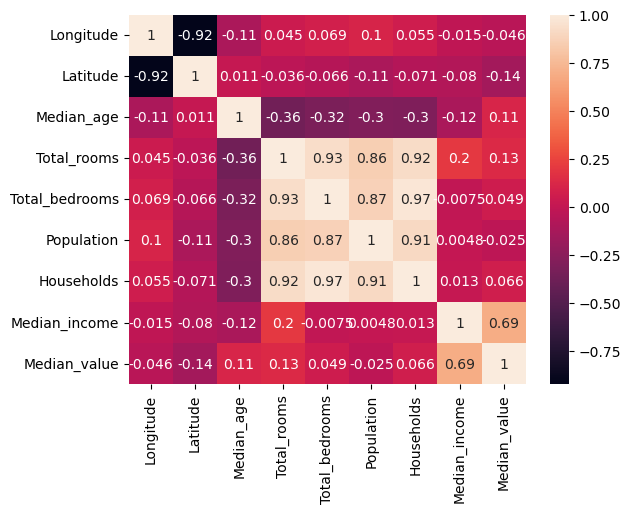

In [88]:
plt.figure()
sns.heatmap(data_corr, annot=True)

¿Podríamos eliminar alguna variable en base a todos estos datos?

#### <center> 6.3.- INTENTO DE MEJORA DE RESULTADOS: </center><a class="anchor" id="6.3"></a>

PAra intentar llevar a cabo esta mejora, vamos a intentar seguir los siguientes pasos:


* 6.3.1.- Eliminar columnas muy correlacionadas y con poca importancia en el primer modelo.<a class="anchor" id="6.3.1"></a>

* 6.3.2.- Vovler a dividir los datos resultantes del paso 6.3.1. en train y test.<a class="anchor" id="6.3.2"></a>

* 6.3.3.- Volver a pasar el ModeloLasso al dataset resultante del paso 6.3.2.<a class="anchor" id="6.3.3"></a>

* 6.3.4.- Estudiar la curva de aprendizaje del modelo con los nuevos datos.<a class="anchor" id="6.3.4"></a>

* 6.3.5.- Estudiar la importancia de las variables del modelo con los nuevos datos.<a class="anchor" id="6.3.5"></a>

* 6.3.6..- Comparar los resultados de ambos modelos.<a class="anchor" id="6.3.6"></a>



#### <center> 6.3.1.- Eliminar columnas muy correlaconadas y con poca importancia en el primer modelo: </center><a class="anchor" id="6.3.1"></a>

Hemos podido comprobar con los datos recogidos de nuestro primer acercamiento al problema, que tenemos variables muy interrelacionadas entre sí:

Total_bedrooms está muy interrelacionadas con Total_rooms, population y Households; Population con total bedrooms y Households, y population con Households. Si a esto le añadimos que Total_rooms y Households son de las variables menos importantes en nuestro primer acercamiento, parecen claras candidatas a ser eliminadas del conjunto de datos. Como Ocean_proximity y Median_age son las 2 menos importantes, también parece lógico que las podamos eliminar de nuestro siguiente paso. De esta manera, podemos eliminar variables que, probablemente, estuviesen midiendo cosas parecidas y que, a la vez, no están entre las más importantes en el primer modelo. 

De esta manera, las nuevas características serían:

* Longitud.
* Latitud.
* Median_income.
* Total_bedrooms y 
* Population.

De 9 características, pasamos a 5.

Pasemos a generar el nuevo dataset:

In [89]:
data

,Longitude,Latitude,Median_age,Total_rooms,Total_bedrooms,Population,Households,Median_income,Median_value,Ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,2290
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,2290
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,2290
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,2290
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,2290
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,6551
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,6551
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,6551
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,6551


In [93]:
salida = ['Median_value']
entrada = ['Longitude','Latitude','Median_income','Total_bedrooms','Population','Median_value']
# Copiamos el DataFrame de los datos a una
# variable llamada "X"
X = data[entrada].copy()

# Y almacenamos en otra variable llamada "y",
# la columna que será nuestra variable de salida.
y = X[salida].copy()

# Borramos de "X" la variable de salida para evitar
# el "Data Leakage".
X.drop(salida, axis=1, inplace=True)

# Y nos aseguramos de tener los mismos tamaños en
# las 2 variables.
print(X.shape)
print(y.shape)

(20640, 5)
(20640, 1)


In [95]:
X.head()

,Longitude,Latitude,Median_income,Total_bedrooms,Population
0,-122.23,37.88,8.3252,129.0,322.0
1,-122.22,37.86,8.3014,1106.0,2401.0
2,-122.24,37.85,7.2574,190.0,496.0
3,-122.25,37.85,5.6431,235.0,558.0
4,-122.25,37.85,3.8462,280.0,565.0


In [96]:
y.head()

,Median_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0


#### <center> 6.3.2.- Volver a dividir los datos resultantes del paso 6.3.1. en train y test. </center><a class="anchor" id="6.3.2"></a>


In [98]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=.2, random_state=42)

print(f'El número total de ejemplos de "X_train" es de: {len(X_train)}: Sus dimensiones son: {X_train2.shape}')
print(f'El número total de ejemplos de "X_test" es de: {len(X_test)}: Sus dimensiones son: {X_test2.shape}')
print(f'El número total de ejemplos de "y_train" es de: {len(y_train)}: Sus dimensiones son: {y_train2.shape}')
print(f'El número total de ejemplos de "y_train" es de: {len(y_test)}: Sus dimensiones son: {y_test2.shape}')

El número total de ejemplos de "X_train" es de: 16512: Sus dimensiones son: (16512, 5)
El número total de ejemplos de "X_test" es de: 4128: Sus dimensiones son: (4128, 5)
El número total de ejemplos de "y_train" es de: 16512: Sus dimensiones son: (16512, 1)
El número total de ejemplos de "y_train" es de: 4128: Sus dimensiones son: (4128, 1)


#### <center> 6.3.3.- Búsqueda del mejor modelo con los nuevos datos </center><a class="anchor" id="6.3.3"></a>

In [102]:
# Creamos el objeto para el particionamiento de la validación.
cv = ShuffleSplit(n_splits=5, test_size=.3, random_state=0)

# Probamos diferentes valores de grado del polinimio
# y regularización (grid-search).
grados = np.arange(1, 10)
reg_values = np.geomspace(1e-5, 1e5, num=9)

# Diccionario de parámetros a probar: Es el "Scoring"
# del GridSearch().
# Al ser una pipeline, usamos nombre__parámetro.
parameters = {'poly__degree': grados, 'reg__alpha': reg_values}

# Generamos la Pipeline.
pipe2 = Pipeline([('poly', PolynomialFeatures(1, include_bias=False)),
                 ('scaler', StandardScaler()),
                 ('reg', Lasso(max_iter=5000, random_state=0))])

# Generamos el objeto GridSearch.
gridsearch2 = GridSearchCV(pipe2,
                           param_grid=parameters,
                           cv=cv,
                           scoring='neg_mean_absolute_error',
                           refit=True,
                           return_train_score=True,
                           n_jobs=-1)

gridsearch2.fit(X_train2, y_train2)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.3, train_size=None),
             estimator=Pipeline(steps=[('poly',
                                        PolynomialFeatures(degree=1,
                                                           include_bias=False)),
                                       ('scaler', StandardScaler()),
                                       ('reg',
                                        Lasso(max_iter=5000, random_state=0))]),
             n_jobs=-1,
             param_grid={'poly__degree': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'reg__alpha': array([1.00000000e-05, 1.77827941e-04, 3.16227766e-03, 5.62341325e-02,
       1.00000000e+00, 1.77827941e+01, 3.16227766e+02, 5.62341325e+03,
       1.00000000e+05])},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [103]:
Modelo_Lasso2 = gridsearch.best_estimator_
Modelo_Lasso2

Pipeline(steps=[('poly', PolynomialFeatures(degree=6, include_bias=False)),
                ('scaler', StandardScaler()),
                ('reg', Lasso(max_iter=10000, random_state=0))])

Para comparar los resultados, creamos un dataframe y lo ponemos en común con el del mejor modelo anterior.

In [104]:
resultados2 = pd.DataFrame(gridsearch2.cv_results_,
                          columns=['params','mean_train_score', 'mean_test_score', 'rank_test_score'])\
.sort_values(by=['rank_test_score'])
resultados2.head()

,params,mean_train_score,mean_test_score,rank_test_score
32,"{'poly__degree': 4, 'reg__alpha': 17.782794100...",-46874.419260,-47468.091829,1
31,"{'poly__degree': 4, 'reg__alpha': 1.0}",-46579.259224,-48200.503669,2
30,"{'poly__degree': 4, 'reg__alpha': 0.0562341325...",-46570.860705,-48209.358445,3
29,"{'poly__degree': 4, 'reg__alpha': 0.0031622776...",-46570.476158,-48210.096997,4
28,"{'poly__degree': 4, 'reg__alpha': 0.0001778279...",-46570.454759,-48210.139501,5


In [109]:
print(f'El error en train del modelo "resultados2 es de: "{round(-resultados2.mean_train_score[32],2)}')
print(f'El error en val del modelo "resultados2 es de: "{round(-resultados2.mean_test_score[32],2)}')

El error en train del modelo "resultados2 es de: "46874.42
El error en val del modelo "resultados2 es de: "47468.09


#### <center> 6.3.4.-  Comparar los resultados de ambos modelos. </center><a class="anchor" id="6.3.4"></a>

Como podemos comprobar, este segundo modelo tiene peores resultados que el primero tanto en train como en test, como podemos observar en la tabla posterior:

| Búsqueda | Error en train | Error en val |
| :- | -: | :-: |
| Búsqueda 1 | 40987.08 | 41965.87
| Búsqueda 2 | 46874.42 | 47468.09


Dados los datos, parece claro que el nodelo entrenado con todos los ejemplos y características es mejor en resultados que el modelo entrenado sólo con algunas de las características, aunque no es menos cierto que el tiempo de computación y análisis es sensiblemente mejor en el segundo modelo. Pero, dado el caso que nos ocupa, parece preferible usar el primer modelo, y más cuando lo hemos serializado y podemos cargarlo rápidamente sin necesitar de más búsquedas qdel mismo modelo queq nos harían perder un tiempo impagable y precioso.

Debido a todo esto, y asólo nos quedaría poner el modelo a prueba con los datos de test que "apartamos" al principio de la búsqueda del mejor modelo, en el punto 6.1.

## <center> 7.- PRUEBA DEL MODELO </center><a class="anchor" id="7"></a>

Ahora vamos a poner nuestro modelo a prueba, simulando que lo ponemos "en producción". Esto significa que vamos a intentar probar cómo se comportaría el modelo si lo pusiésemos a trabajar en las condiciones reales a las que se enfrenta el sector inmobiliario .

In [37]:
ModeloLasso.fit(X_train, y_train.ravel())

Pipeline(steps=[('poly', PolynomialFeatures(degree=5, include_bias=False)),
                ('scaler', StandardScaler()),
                ('reg',
                 Lasso(alpha=17.78279410038923, max_iter=5000,
                       random_state=0))])

In [38]:
pred_X = ModeloLasso.predict(X_train)
error = mean_absolute_error(y_train, pred_X)
print(f'El error en entrenamiento del mejor modelo es de {round(error,2)}€')

El error en entrenamiento del mejor modelo es de 41045.81€


Como podemos observar, el error es bastante parecido al que hemso obtenido en nuestras pruebas para la búsqueda del mejor modelo:

| Error en la búsqueda | Error en train | Diferencia
|  -: | :-: |:-: |
| 40987.08€ | 41045.81€ | 58.73€ |

Esto es lógico, dado que hemos escogido el modelo que menos error nos daba en el la búesqueda. La leve diferencia puede ser debida a que ahora estamos utilizando todo el conjunto de X_train, mientras que durante la búsqueda, particionamos ese conjunto en 2 diferentes, entrenamiento y validación.

Ahora vamos a utilizar nuestra partición de test para estudiar cómo se comporta el modelo con datos que no ha visto en ningún momento de todos los preocesos anteriores. Esto, lo que nos enseña es cómo se comportaría el modelo viendo datos nuevos una vez se hubiese puesto en prpoducción, es decir, estamos simulando que nuestro modelo ya está trabajando en el "mundo real".

De esta manera, lo que hacemos es predecir con nuestro modelo en base a los datos que separamos en test en el punto 6.1 y buscar el error de esas predicciones según la fórmula que hemos estado utilizando durante todo el estudio, el error absoluto medio, para saber cómo de bien o mal está prediciendo nuestro modelo.

In [39]:
pred_test = ModeloLasso.predict(X_test)
error_test = mean_absolute_error(y_test, pred_test)
print(f'El error en test del mejor modelo es de {round(error_test,2)}€')

El error en test del mejor modelo es de 44298.32€


Ahora, para poder comparar el error en test, vamos a calcular el error medio de todos los precios de los bloques de nuestro daatsete, y así podremos evaluar porcentualmente (que es una manera muy gráfica y fácil de entender el grado de error) el error de nuestro modelo "en producción"

In [40]:
media_valor = round(data.Median_value.mean(),2)
print(f'EL valor medio de los bloques de edificios del dataset es de {media_valor}€')

EL valor medio de los bloques de edificios del dataset es de 206855.82€


In [41]:
media_error = round(error_test*100/media_valor,2)
print(f'El error porcentual en base al valor medio de los bloques inmuebles es del {media_error}%')

El error porcentual en base al valor medio de los bloques inmuebles es del 21.42%


Este porcentaje es inaceptable. No se puede dar como buenos los resultados de un modelo que falla más de una vez de cada cinco ejemplos. Por ello debemos pensar en cómo intentar dar con una mejor solución que una regresión lineal con polinomiales para resolver nuetro problema de intentar predecir los precios de los bloques de vivendas.

## <center> 8.- CONCLUSIONES Y ACCIONES FUTURAS </center><a class="anchor" id="8"></a>

Es claro que la conclusión principal que debemos sacar es que la regresión lineal con polinomiales no no es válida para resolver este problema en concreto, dado que su error supera el 20%. Por ello, y de cara a intentar mejorar ese resultado, pensamos que se puede intentar utilizar otros modelos de regresión para intentar mejorar los resultados, como:

   * 1.1.- SVMs.
   * 1.2.- Redes neuronales.
   * 1.3.- Árboles de decisión.
    
Teniendo en cuenta que ya tenemos echos el estudio de los datos gracias a este primer modelo, podemos suponer que el resto de modelos deberían costarnos menos tiempo y esfuerzo.
